### Predicting handwritten digits using deep learning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Let's load the dataset using keras
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

# Display the shape of the dataset
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


### Visualizing the data

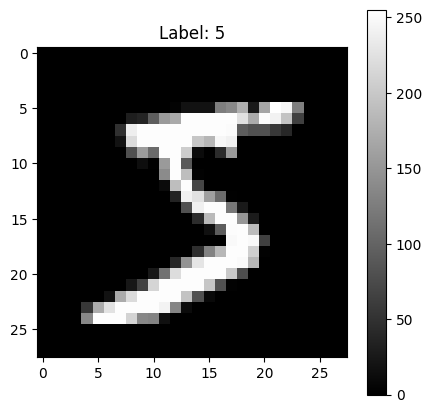

Min pixel value: 0
Max pixel value: 255


In [9]:
# This is the first time taking a look at the MNIST dataset , so I want to take a good look at what the data looks like.

# Let's look at the first image
plt.figure(figsize=(5,5))
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.title(f"Label: {train_labels[0]}")
plt.show()

# Get min and max values of pixel intensities
min_pixel_value = np.min(train_images) 
max_pixel_value = np.max(train_images) 

print(f"Min pixel value: {min_pixel_value}") # Minimum value is 0, so black = 0
print(f"Max pixel value: {max_pixel_value}") # Max value is 255, so white = 255

### Normalizing the data

In [12]:
# 255 is a big value, so lets normalize the data to a range between 0 and 1
if train_images.max() == 255: # if statement, just so I don't accidentally divide the data by 255 twice
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0

# And to verify the normalization
print(f"Min pixel value after normalization: {train_images.min()}")
print(f"Max pixel value after normalization: {train_images.max()}")

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


### Convert images to vectors

In [13]:
# The neural net I want to use only accepts vectors, so let's reshape the 2d imageinto a 1d vector.

# train_images.shape[0] gives the number of images
# -1 tells NumPy to calculate the size of this dimension automatically
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Verify the new shape
print(f"New shape of training images: {train_images_flattened.shape}")
print(f"New shape of test images: {test_images_flattened.shape}")

60000
New shape of training images: (60000, 784)
New shape of test images: (10000, 784)


### Initial test NN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# We're going to use two hidden layers, the first with 128, and the second with 64. Both using Relu as the activation function.
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Then to train the model we compiled above
history = model.fit(train_images_flattened, train_labels, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2) # 20% of the training set is used to validate the model

# let's see what the accuracy of the model is using the test data
test_loss, test_accuracy = model.evaluate(test_images_flattened, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9211 - val_loss: 0.1257 - val_accuracy: 0.9632
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1114 - accuracy: 0.9671 - val_loss: 0.1018 - val_accuracy: 0.9711
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0999 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0917 - val_accuracy: 0.9739
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.0946 - val_accuracy: 0.9759
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0954 - val_accuracy:

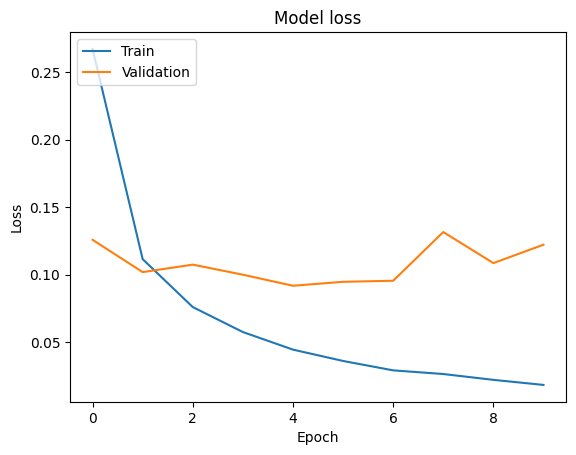

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()